In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt




In [2]:
# # Download the dataset
# dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
# raw_data = dataframe.values
# dataframe
# print(raw_data.shape)

In [3]:

# Transforms images to a PyTorch Tensor
# tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
# dataset = datasets.MNIST(root = "./data",
#                          train = True,
#                          download = True,
#                          transform = tensor_transform)
from torch.utils.data import Dataset, DataLoader


# class MyDataset(Dataset):
#     def __init__(self, data):
#         self.data = torch.tensor(data.values, dtype=torch.float32)

#     def __getitem__(self, index):
#         return self.data[index]

#     def __len__(self):
#         return len(self.data)

class SpectralDataset(Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return len(self.data)
    
    
# dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
# raw_data = dataframe.values
# dataframe.head()
# dataset = dataframe.iloc[:,:-1]

# dataset = MyDataset(dataset)
# loader = DataLoader(dataset, batch_size=2048, shuffle=True)




# # THIS IS WRONG. can't easily convert from pandas dataframe to pytorch dataset

# # DataLoader is used to load the dataset
# # for training
# # loader = torch.utils.data.DataLoader(dataset = dataset,
# #                                      batch_size = 2048,
# #                                      shuffle = True)


In [4]:
# # The last element contains the labels
# labels = raw_data[:, -1]

# # The other data points are the electrocadriogram data
# data = raw_data[:, 0:-1]
# print(data.shape)
# train_data, test_data, train_labels, test_labels = train_test_split(
#     data, labels, test_size=0.2, random_state=21
# )

In [5]:
# min_val = torch.min(torch.from_numpy(train_data))
# max_val = torch.max(torch.from_numpy(train_data))

# train_data = (torch.from_numpy(train_data) - min_val) / (max_val - min_val)
# test_data = (torch.from_numpy(test_data) - min_val) / (max_val - min_val)

# train_data = train_data.float()
# test_data = test_data.float()

In [6]:
# train_labels = train_labels.astype(bool)
# test_labels = test_labels.astype(bool)

# normal_train_data = train_data[train_labels]
# normal_test_data = test_data[test_labels]

# anomalous_train_data = train_data[~train_labels]
# anomalous_test_data = test_data[~test_labels]

In [7]:
# plt.grid()
# plt.plot(np.arange(140), normal_train_data[0])
# plt.title("A Normal ECG")
# plt.show()

In [8]:
# plt.grid()
# plt.plot(np.arange(140), anomalous_train_data[0])
# plt.title("An Anomalous ECG")
# plt.show()

In [9]:
# # Creating a PyTorch class
# # 28*28 ==> 9 ==> 28*28
# class AE(torch.nn.Module):
#     def __init__(self):
#         super().__init__()

#         # Building an linear encoder with Linear
#         # layer followed by Relu activation function
#         # 140 ==> 3
#         self.encoder = torch.nn.Sequential(
#             torch.nn.Linear(140, 32),
#             torch.nn.ReLU(),
#             torch.nn.Linear(32, 16),
#             torch.nn.ReLU(),
#             torch.nn.Linear(16, 8),
#             # torch.nn.ReLU(),
#             # torch.nn.Linear(8, 3)
#         )

#         # Building an linear decoder with Linear
#         # layer followed by Relu activation function
#         # The Sigmoid activation function
#         # outputs the value between 0 and 1
#         # 3 ==> 140
#         self.decoder = torch.nn.Sequential(
#             # torch.nn.Linear(3, 8),
#             # torch.nn.ReLU(),
#             torch.nn.Linear(8, 16),
#             torch.nn.ReLU(),
#             torch.nn.Linear(16, 32),
#             torch.nn.ReLU(),
#             torch.nn.Linear(32, 140),
#             torch.nn.Sigmoid()
#         )

#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

In [10]:
# # Model Initialization
# model = AE()

# # Validation using MSE Loss function
# # loss_function = torch.nn.MSELoss()
# # Validation using MAE Loss function
# loss_function = torch.nn.L1Loss()

# # Using an Adam Optimizer with lr = 0.1
# optimizer = torch.optim.Adam(model.parameters(),
#                              lr = 1e-1,
#                              weight_decay = 1e-8)

In [11]:
# epochs = 100
# outputs = []
# losses = []
# for epoch in range(epochs):
#     for image in loader:

#       # Reshaping the image to (-1, 784)
#       # image = image.reshape(-1, 28*28)
#       # image = image.to(device)

#       # Output of Autoencoder
#       reconstructed = model(image)

#       # Calculating the loss function
#       loss = loss_function(reconstructed, image)

#       # The gradients are set to zero,
#       # the gradient is computed and stored.
#       # .step() performs parameter update
#       optimizer.zero_grad()
#       loss.backward()
#       optimizer.step()

#       # Storing the losses in a list for plotting
#       losses.append(loss.detach().numpy())
#     outputs.append((epochs, image, reconstructed))

# # Defining the Plot Style
# plt.style.use('fivethirtyeight')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')

# # Plotting the last 100 values
# plt.plot(losses[-100:])

In [12]:
# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(32, activation="relu"),
#       layers.Dense(16, activation="relu"),
#       layers.Dense(8, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(16, activation="relu"),
#       layers.Dense(32, activation="relu"),
#       layers.Dense(140, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# autoencoder = AnomalyDetector()

# autoencoder.compile(optimizer='adam', loss='mae')
# torch_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)

# normal_train_data = tf.convert_to_tensor(torch_tensor.numpy(), dtype=tf.float32)

# history = autoencoder.fit(normal_train_data, normal_train_data,
#           epochs=20,
#           batch_size=2048,
#           validation_data=(test_data, test_data),
#           shuffle=True)


In [13]:
# # Training loop


# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = torch.nn.MSELoss()


# train_loader = DataLoader(train_data, batch_size=512, shuffle=True)
# test_loader = DataLoader(test_data, batch_size=512)

# epochs = 200
# history_loss_train = []
# history_loss_val = []
# for epoch in range(epochs):
#     model.train()
#     for inputs in train_loader:
#         # inputs = inputs.to(device)
#         outputs = model(inputs)
#         loss = criterion(outputs, inputs)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     model.eval()
#     with torch.no_grad():
#         for inputs in test_loader:
#             # inputs = inputs.to(device)
#             outputs = model(inputs)
#             val_loss = criterion(outputs, inputs)
#     history_loss_train.append(loss.item())
#     history_loss_val.append(val_loss.item())
#     # print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}')



In [14]:
# plt.plot(history_loss_train, label="Training Loss")
# plt.plot(history_loss_val, label="Validation Loss")
# plt.legend()


In [15]:
# encoded_data = model.encoder(normal_test_data).detach().numpy()
# # decoded_data = model.decoder(encoded_data).detach().numpy()
# decoded_data = model.decoder(torch.from_numpy(encoded_data)).detach()
# # plt.plot(normal_test_data[0], 'b')
# plt.plot(anomalous_train_data[0], 'b')


# plt.plot(decoded_data[0], 'r')
# plt.fill_between(np.arange(140), decoded_data[0], anomalous_train_data[0], color='lightcoral')
# plt.legend(labels=["Input", "Reconstruction", "Error"])
# plt.show()


In [16]:
# encoded_data = model.encoder(normal_test_data).detach().numpy()
# # decoded_data = model.decoder(encoded_data).detach().numpy()
# decoded_data = model.decoder(torch.from_numpy(encoded_data)).detach()
# plt.plot(normal_test_data[0], 'b')
# # plt.plot(anomalous_train_data[0], 'b')


# plt.plot(decoded_data[0], 'r')
# plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
# plt.legend(labels=["Input", "Reconstruction", "Error"])
# plt.show()

In [17]:
import os
import cv2
def load_hsi(file_name):
    # load hyperspectral image
    _, extension = os.path.splitext(file_name)

    if extension == '.tiff':
        #below is a way to load hyperspectral images that are tiff files
        mylist = []
        loaded,mylist = cv2.imreadmulti(mats = mylist, filename = file_name, flags = cv2.IMREAD_ANYCOLOR )
        cube=np.array(mylist)
        cube = cube[:, :, :]
    else :
        print("Error: file type not supported")
        return
    return cube

hyperImage = load_hsi('../../HyperImages/img1.tiff')


In [18]:
print(hyperImage.shape)
hyper_result = np.transpose(hyperImage, (2, 1, 0))
print(hyper_result.shape)
#hyper_2d = hyper_result.reshape(hyper_result[0] * hyper_result[1], hyper_result[2])
new_shape_first_dim = hyper_result.shape[0] * hyper_result.shape[1]
hyper_2d = hyper_result.reshape((new_shape_first_dim, hyper_result.shape[2]))
print(hyper_2d.shape)

(164, 1886, 1886)
(1886, 1886, 164)
(3556996, 164)


In [19]:
spectral_dataset = SpectralDataset(hyper_2d)
spectral_loader = DataLoader(spectral_dataset, batch_size=2048, shuffle=True)

spectral_train_data, spectral_test_data = train_test_split(
    spectral_dataset,  test_size=0.3, random_state=21
)

min_val = torch.min(torch.from_numpy(hyper_2d))
max_val = torch.max(torch.from_numpy(hyper_2d))

# spectral_train_data = ((torch.from_numpy(spectral_train_data) - min_val) / (max_val - min_val)).float()
# spectral_test_data = ((torch.from_numpy(spectral_test_data) - min_val) / (max_val - min_val)).float()

# Normalize each Tensor in the list
spectral_train_data = [(data - min_val) / (max_val - min_val) for data in spectral_train_data]
spectral_test_data = [(data - min_val) / (max_val - min_val) for data in spectral_test_data]

# Convert the list of Tensors to a single Tensor
spectral_train_data = torch.stack(spectral_train_data).float()
spectral_test_data = torch.stack(spectral_test_data).float()




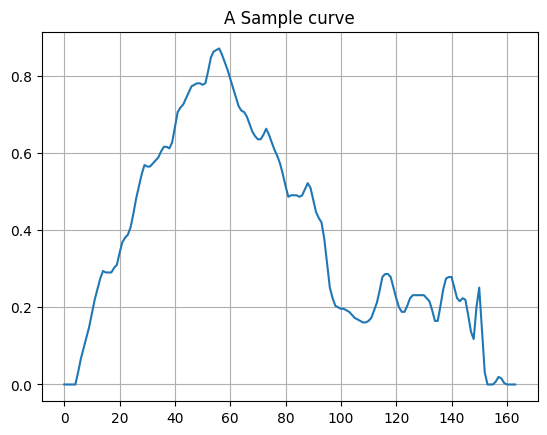

In [20]:
plt.grid()
plt.plot(np.arange(hyper_2d.shape[1]), spectral_train_data[0])
plt.title("A Sample curve")
plt.show()

In [21]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class spectral_AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 140 ==> 3
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(hyper_2d.shape[1], 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 3)
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 3 ==> 140
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(3, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, hyper_2d.shape[1]),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [22]:
spectral_model = spectral_AE()


train_loader = DataLoader(spectral_train_data, batch_size=16384, shuffle=True)
test_loader = DataLoader(spectral_test_data, batch_size=16384)






In [23]:
loss_function = torch.nn.L1Loss()
criterion = torch.nn.MSELoss()
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print (device)
spectral_model = spectral_model.to(device)
optimizer = torch.optim.Adam(spectral_model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-5)

epochs = 200
history_loss_train = []
history_loss_val = []
for epoch in range(epochs):
    spectral_model.train()
    for inputs in train_loader:
        inputs = inputs.to(device)
        outputs = spectral_model(inputs)
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    spectral_model.eval()
    with torch.no_grad():
        for inputs in test_loader:
            inputs = inputs.to(device)
            outputs = spectral_model(inputs)
            val_loss = criterion(outputs, inputs)
    history_loss_train.append(loss.item())
    history_loss_val.append(val_loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 1/200, Loss: 0.033117230981588364, Validation Loss: 0.03424878790974617
Epoch 2/200, Loss: 0.0023345020599663258, Validation Loss: 0.002339345868676901
Epoch 3/200, Loss: 0.0021203081123530865, Validation Loss: 0.0020654117688536644
Epoch 4/200, Loss: 0.0018976868595927954, Validation Loss: 0.0019297084072604775
Epoch 5/200, Loss: 0.0018424976151436567, Validation Loss: 0.001807218068279326
Epoch 6/200, Loss: 0.001724548521451652, Validation Loss: 0.0016774935647845268
Epoch 7/200, Loss: 0.0016467631794512272, Validation Loss: 0.0016179218655452132
Epoch 8/200, Loss: 0.001602418371476233, Validation Loss: 0.0015817765379324555
Epoch 9/200, Loss: 0.0015711142914369702, Validation Loss: 0.0015583302592858672
Epoch 10/200, Loss: 0.0015710885636508465, Validation Loss: 0.0015568914823234081
Epoch 11/200, Loss: 0.0015485858311876655, Validation Loss: 0.0015502318274229765
Epoch 12/200, Loss: 0.001530986512079835, Validation Loss: 0.00150776794180274
Epoch 13/200, Loss: 0.0015802793204

KeyboardInterrupt: 

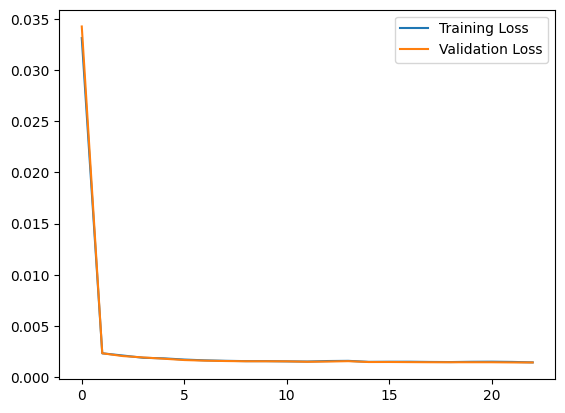

In [24]:
plt.plot(history_loss_train, label="Training Loss")
plt.plot(history_loss_val, label="Validation Loss")
plt.legend()


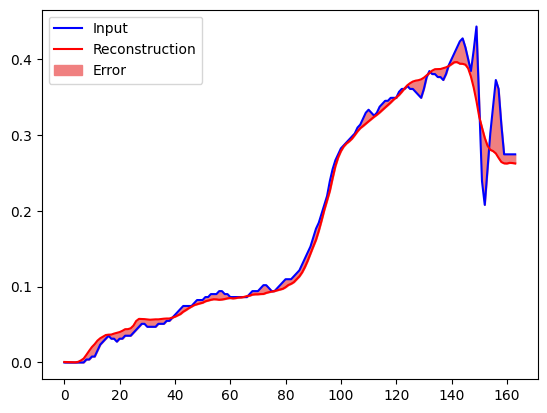

In [25]:
spectral_test_data = spectral_test_data.to(device)

encoded_data = spectral_model.encoder(spectral_test_data).detach().cpu().numpy()
decoded_data = spectral_model.decoder(torch.from_numpy(encoded_data).to(device)).detach().cpu().numpy()

# encoded_data = spectral_model.encoder(spectral_test_data).detach().numpy()
# decoded_data = model.decoder(encoded_data).detach().numpy()
# decoded_data = spectral_model.decoder(torch.from_numpy(encoded_data)).detach()
# plt.plot(normal_test_data[0], 'b')

spectral_test_data_np = spectral_test_data.cpu().numpy()

plt.plot(spectral_test_data_np[0], 'b')


plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(hyper_2d.shape[1]), decoded_data[0], spectral_test_data_np[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
# test_index=1000
# plt.plot(spectral_test_data_np[test_index], 'b')


# plt.plot(decoded_data[test_index], 'r')
# plt.fill_between(np.arange(hyper_2d.shape[1]), decoded_data[test_index], spectral_test_data_np[test_index], color='lightcoral')
# plt.legend(labels=["Input", "Reconstruction", "Error"])
# plt.show()

In [ ]:
#show image 


# print(hyper_2d.shape)
# hyper_2d_tensor = torch.from_numpy(hyper_2d).float().to(device)
# encoded_data = spectral_model.encoder(hyper_2d_tensor).detach().cpu().numpy()
# print(encoded_data.shape)
# print(hyperImage.shape)
# encoded_data_reshaped = encoded_data.reshape(1886,1886,3)
# print(encoded_data_reshaped.shape)

# # encoded_result_img = np.transpose(encoded_data_reshaped, (2, 1, 0))
# # plt.imshow(encoded_data_reshaped[:,:,0], cmap='gray')
# # plt.imshow(encoded_data_reshaped[:,:,1], cmap='gray')
# # plt.imshow(encoded_data_reshaped[:,:,2], cmap='gray')
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.imshow(encoded_data_reshaped[:,:,0], cmap='gray')
# plt.title('Channel 1')

# plt.subplot(1, 3, 2)
# plt.imshow(encoded_data_reshaped[:,:,1], cmap='gray')
# plt.title('Channel 2')

# plt.subplot(1, 3, 3)
# plt.imshow(encoded_data_reshaped[:,:,2], cmap='gray')
# plt.title('Channel 3')

# plt.show()



(164, 1886, 1886)
(3556996, 3)
(164, 1886, 1886)
-1693.2397
1184.7598
0.0
1.0


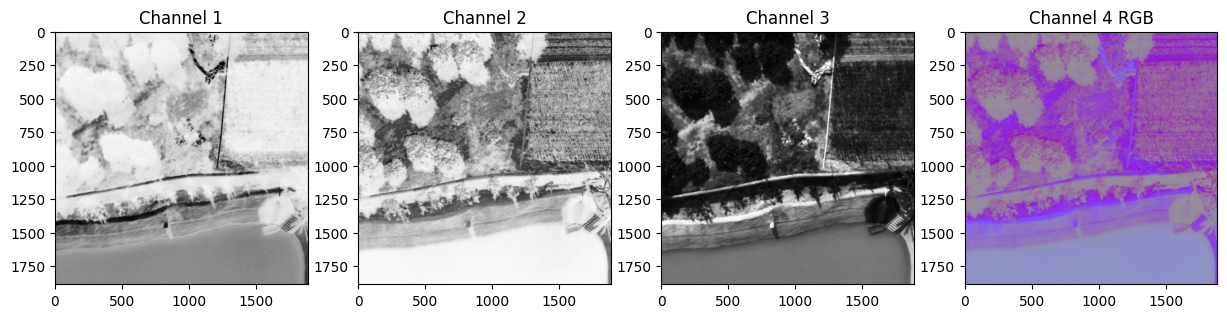

In [28]:
print(hyperImage.shape)
hyperImage_reshaped = np.transpose(hyperImage, (1, 2, 0))  # Reshape hyperImage before encoding
hyperImage_reshaped = hyperImage_reshaped.reshape((new_shape_first_dim, -1))  # Keep the second dimension flexible
hyper_2d_tensor = torch.from_numpy(hyperImage_reshaped).float().to(device)
encoded_data = spectral_model.encoder(hyper_2d_tensor).detach().cpu().numpy()
print(encoded_data.shape)
print(hyperImage.shape)
encoded_data_reshaped = encoded_data.reshape(1886,1886,3)

plt.figure(figsize=(15, 5))
print(np.min(encoded_data_reshaped))
print(np.max(encoded_data_reshaped))
encoded_data_reshaped2 = encoded_data_reshaped- np.min(encoded_data_reshaped)
encoded_data_reshaped2 = encoded_data_reshaped2/(np.max(encoded_data_reshaped)-np.min(encoded_data_reshaped))
print(np.min(encoded_data_reshaped2))
print(np.max(encoded_data_reshaped2))

plt.subplot(1, 4, 1)
plt.imshow(encoded_data_reshaped2[:,:,0], cmap='gray')
plt.title('Channel 1')



plt.subplot(1, 4, 2)
plt.imshow(encoded_data_reshaped2[:,:,1], cmap='gray')
plt.title('Channel 2')

plt.subplot(1, 4, 3)
plt.imshow(encoded_data_reshaped2[:,:,2], cmap='gray')
plt.title('Channel 3')

plt.subplot(1, 4, 4)
plt.imshow(encoded_data_reshaped2)
plt.title('Channel 4 RGB')

plt.show()




In [29]:
torch.save(spectral_model.state_dict(), '/workspaces/HyperTools/spectral_model.pth')

: 